In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sephora_products = pd.read_csv("product_info.csv", low_memory = False)
sephora_review1 = pd.read_csv("reviews_0-250.csv", low_memory = False)
sephora_review2 = pd.read_csv("reviews_250-500.csv", low_memory = False)
sephora_review3 = pd.read_csv("reviews_500-750.csv", low_memory = False)
sephora_review4 = pd.read_csv("reviews_750-1250.csv", low_memory = False)
sephora_review5 = pd.read_csv("reviews_1250-end.csv", low_memory = False)

In [3]:
files = [
    "reviews_0-250.csv",
    "reviews_250-500.csv",
    "reviews_500-750.csv",
    "reviews_750-1250.csv",
    "reviews_1250-end.csv"
]

dfs = [pd.read_csv(f) for f in files]

full_reviews_df = pd.concat(dfs, ignore_index=True)

full_reviews_df.to_csv("all_reviews.csv", index=False)

C:\Users\visha\AppData\Local\Temp\ipykernel_30728\2543999641.py:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(f) for f in files]
C:\Users\visha\AppData\Local\Temp\ipykernel_30728\2543999641.py:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(f) for f in files]
C:\Users\visha\AppData\Local\Temp\ipykernel_30728\2543999641.py:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs = [pd.read_csv(f) for f in files]


In [4]:
full_reviews_df.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [5]:
full_reviews_df.shape

(1094411, 19)

In [6]:
full_reviews_df = full_reviews_df[['product_name','author_id','rating', 'review_text','review_title']]
full_reviews_df.head()

,product_name,author_id,rating,review_text,review_title
0,Gentle Hydra-Gel Face Cleanser,1741593524,5,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!
1,Lip Sleeping Mask Intense Hydration with Vitam...,31423088263,1,I bought this lip mask after reading the revie...,Disappointed
2,Lip Sleeping Mask Intense Hydration with Vitam...,5061282401,5,My review title says it all! I get so excited ...,New Favorite Routine
3,Lip Sleeping Mask Intense Hydration with Vitam...,6083038851,5,I’ve always loved this formula for a long time...,Can't go wrong with any of them
4,Lip Sleeping Mask Intense Hydration with Vitam...,47056667835,5,"If you have dry cracked lips, this is a must h...",A must have !!!


In [7]:
missing_reviews = full_reviews_df[full_reviews_df["review_text"].isna() | (full_reviews_df["review_text"].str.strip() == "")]
missing_reviews

,product_name,author_id,rating,review_text,review_title
8622,Lip Sleeping Mask Intense Hydration with Vitam...,5952525178,5,NaN,NaN
8686,Lip Sleeping Mask Intense Hydration with Vitam...,1647814143,5,NaN,NaN
8709,Lip Sleeping Mask Intense Hydration with Vitam...,1288462295,5,NaN,NaN
8748,Lip Sleeping Mask Intense Hydration with Vitam...,5172094692,2,NaN,NaN
8763,Lip Sleeping Mask Intense Hydration with Vitam...,6175243190,5,NaN,NaN
...,...,...,...,...,...
1088943,Micro Essence Infusion Mask,7910932549,3,NaN,NaN
1089025,Disco Tan Instant Wash-Off Body Bronzer,10601788393,2,NaN,NaN
1090248,Youth Junkie Activated Mask,12774446891,5,NaN,NaN
1092752,Ultimate Revival Essence,1531763731,5,NaN,NaN


In [8]:
full_reviews_df = full_reviews_df[ full_reviews_df["review_text"].notna() & (full_reviews_df["review_text"].str.strip() != "") ]

In [9]:
full_reviews_df.isna().sum()

product_name         0
author_id            0
rating               0
review_text          0
review_title    309210
dtype: int64

In [10]:
full_reviews_df=full_reviews_df.reset_index(drop = True)

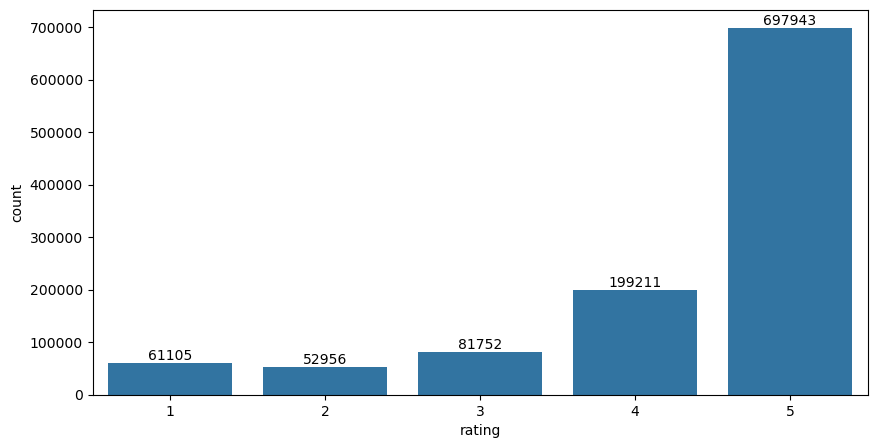

In [11]:
plt.figure(figsize = (10,5))
ax0 = sns.countplot(x = 'rating', data = full_reviews_df)
ax0.bar_label(ax0.containers[0])
plt.show()

In [12]:
sephora_products.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [13]:
sephora_products = sephora_products[['product_name','brand_name', 'price_usd', 
                                     'primary_category','secondary_category','tertiary_category',
                                     'variation_type', 'ingredients','highlights', 'new', 'sephora_exclusive']]

In [14]:
sephora_products.head()

,product_name,brand_name,price_usd,primary_category,secondary_category,tertiary_category,variation_type,ingredients,highlights,new,sephora_exclusive
0,Fragrance Discovery Set,19-69,35.0,Fragrance,Value & Gift Sets,Perfume Gift Sets,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...","['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",0,0
1,La Habana Eau de Parfum,19-69,195.0,Fragrance,Women,Perfume,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",0,0
2,Rainbow Bar Eau de Parfum,19-69,195.0,Fragrance,Women,Perfume,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",0,0
3,Kasbah Eau de Parfum,19-69,195.0,Fragrance,Women,Perfume,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",0,0
4,Purple Haze Eau de Parfum,19-69,195.0,Fragrance,Women,Perfume,Size + Concentration + Formulation,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...","['Unisex/ Genderless Scent', 'Layerable Scent'...",0,0


In [15]:
sephora_products.shape

(8494, 11)

In [16]:
sephora_products.isna().sum()

product_name             0
brand_name               0
price_usd                0
primary_category         0
secondary_category       8
tertiary_category      990
variation_type        1444
ingredients            945
highlights            2207
new                      0
sephora_exclusive        0
dtype: int64

In [17]:
cols_to_check = [
    "brand_name",
    "price_usd",
    "primary_category",
    "secondary_category",
    "tertiary_category",
    "variation_type",
    "ingredients",
    "highlights",
    "new",
    "sephora_exclusive"
]
sephora_products = sephora_products.dropna(subset=cols_to_check)


In [18]:
sephora_products.isna().sum()

product_name          0
brand_name            0
price_usd             0
primary_category      0
secondary_category    0
tertiary_category     0
variation_type        0
ingredients           0
highlights            0
new                   0
sephora_exclusive     0
dtype: int64

In [19]:
sephora_products = sephora_products.reset_index(drop = True) 

In [20]:
sephora_products.shape

(4710, 11)

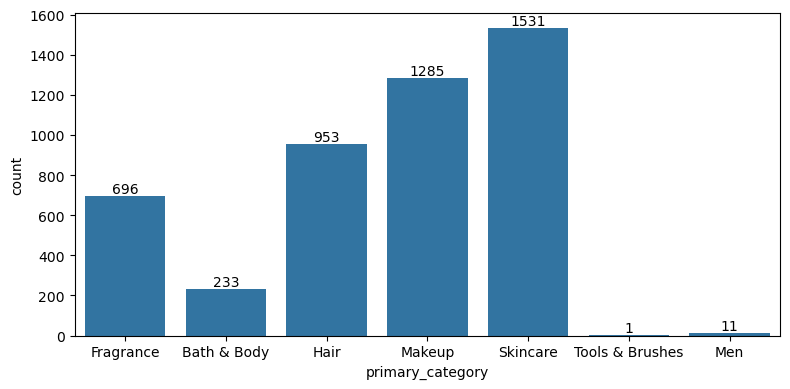

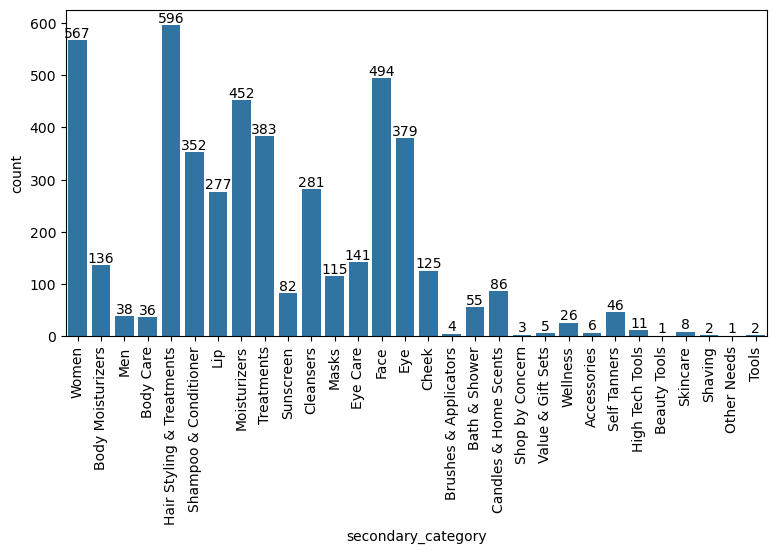

In [21]:
plt.figure(figsize=(8,4))
ax1 = sns.countplot(x = 'primary_category', data = sephora_products)
ax1.bar_label(ax1.containers[0])
plt.tight_layout()
plt.show()

plt.figure(figsize =(8,4))
ax2 = sns.countplot(x = 'secondary_category', data = sephora_products)
ax2.bar_label(ax2.containers[0])
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

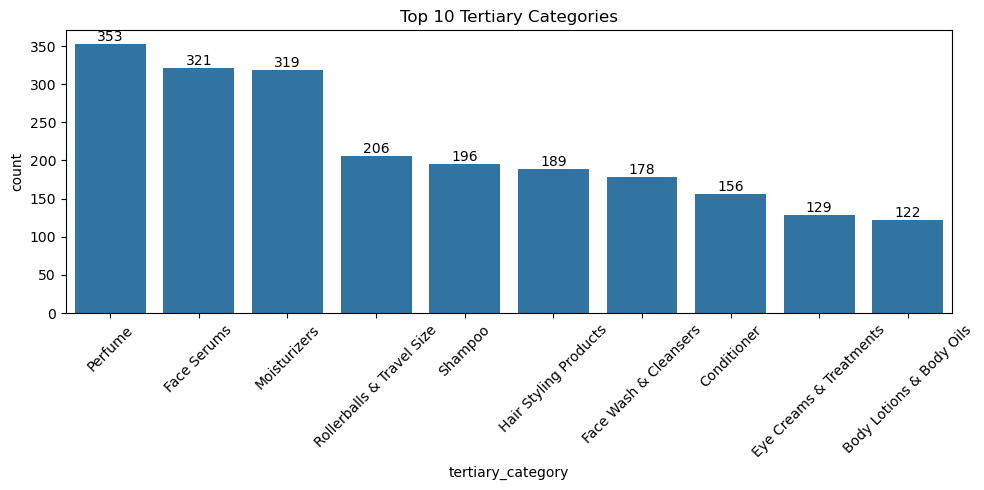

In [22]:
top10 = sephora_products['tertiary_category'].value_counts().nlargest(10).index

plt.figure(figsize=(10,5))
ax4= sns.countplot(
    x='tertiary_category',
    data=sephora_products,
    order=top10
)
ax4.bar_label(ax4.containers[0])
plt.title("Top 10 Tertiary Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

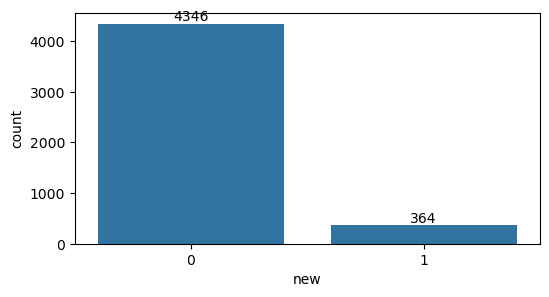

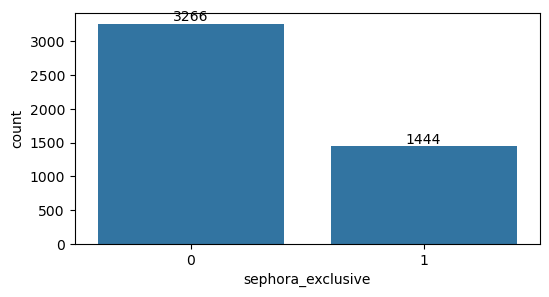

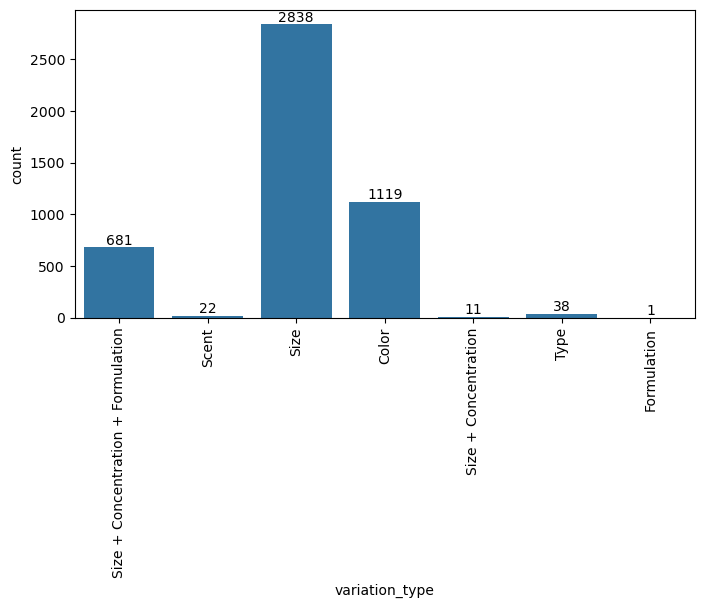

In [23]:
plt.figure(figsize =(6,3))
ax3 = sns.countplot(x = 'new', data = sephora_products)
ax3.bar_label(ax3.containers[0])
plt.show()

plt.figure(figsize =(6,3))
ax4 = sns.countplot(x = 'sephora_exclusive', data = sephora_products)
ax4.bar_label(ax4.containers[0])
plt.show()

plt.figure(figsize =(8,4))
ax5 = sns.countplot(x = 'variation_type', data = sephora_products)
ax5.bar_label(ax5.containers[0])
plt.xticks(rotation = 90)
plt.show()

In [24]:
#Step 1: clean product_name in both dataframes 

sephora_products['product_name_clean'] = (
    sephora_products['product_name']
    .astype(str)
    .str.lower()
    .str.strip()
    .str.replace(r'["“”]', '', regex=True)
)

full_reviews_df['product_name_clean'] = (
    full_reviews_df['product_name']
    .astype(str)
    .str.lower()
    .str.strip()
    .str.replace(r'["“”]', '', regex=True)
)




In [25]:
#Step 2: Aggregate Reviews to the Product Level 

review_agg = full_reviews_df.groupby('product_name_clean').agg(
    avg_rating=('rating', 'mean'),
    num_reviews=('rating', 'count')
).reset_index()

Sephora_ml = sephora_products.merge(
    review_agg,
    on='product_name_clean',
    how='left'
)

Sephora_ml['num_reviews'] = Sephora_ml['num_reviews'].fillna(0)
Sephora_ml['avg_rating'] = Sephora_ml['avg_rating'].fillna(Sephora_ml['avg_rating'].median())


In [26]:
#checking
sephora_products['product_name_clean'].head()

0              la habana eau de parfum
1            rainbow bar eau de parfum
2                 kasbah eau de parfum
3            purple haze eau de parfum
4    kasbah eau de parfum travel spray
Name: product_name_clean, dtype: object

In [27]:
Sephora_ml.shape
Sephora_ml[['price_usd','num_reviews','avg_rating']].head()


,price_usd,num_reviews,avg_rating
0,195.0,0.0,4.357895
1,195.0,0.0,4.357895
2,195.0,0.0,4.357895
3,195.0,0.0,4.357895
4,30.0,0.0,4.357895


In [28]:
#Step 3: Final Modeling Setup

Sephora_ml['high_rating'] = (Sephora_ml['avg_rating'] >= 4).astype(int)
Sephora_ml['high_rating'].value_counts()


high_rating
1    4427
0     283
Name: count, dtype: int64

In [29]:
#defining features

features = [
    'price_usd',
    'num_reviews',
    'brand_name',
    'primary_category',
    'secondary_category',
    'tertiary_category',
    'variation_type',
    'new',
    'sephora_exclusive'
]

X = Sephora_ml[features]
y = Sephora_ml['high_rating']

#seperating numerical vs categorical columns 

num_features = ['price_usd', 'num_reviews']

cat_features = [
    'brand_name',
    'primary_category',
    'secondary_category',
    'tertiary_category',
    'variation_type',
    'new',
    'sephora_exclusive'
]


In [30]:
#building the preprocessing pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
    ]
)



In [31]:
#splitting into train/test (stratified 80/20)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [32]:
#applying preprocessing

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [33]:
X_train_processed.shape

(3768, 399)

In [34]:
X_test_processed.shape

(942, 399)

In [35]:
y_train.value_counts(normalize=True)

high_rating
1    0.940021
0    0.059979
Name: proportion, dtype: float64

In [36]:
y_test.value_counts(normalize=True)

high_rating
1    0.93949
0    0.06051
Name: proportion, dtype: float64

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

rf_clf.fit(X_train_processed, y_train)

y_pred = rf_clf.predict(X_test_processed)

accuracy = accuracy_score(y_test, y_pred)
accuracy_pct = accuracy * 100

print(f"Accuracy: {accuracy_pct:.2f}%")   
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["low_rating", "high_rating"]))

Accuracy: 92.99%

Confusion Matrix:
[[ 12  45]
 [ 21 864]]

Classification Report:
              precision    recall  f1-score   support

  low_rating       0.36      0.21      0.27        57
 high_rating       0.95      0.98      0.96       885

    accuracy                           0.93       942
   macro avg       0.66      0.59      0.61       942
weighted avg       0.91      0.93      0.92       942



In [38]:
num_features = ['price_usd', 'num_reviews']

cat_features = [
    'brand_name',
    'primary_category',
    'secondary_category',
    'tertiary_category',
    'variation_type',
    'new',
    'sephora_exclusive'
]

ohe = preprocessor.named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(cat_features)

feature_names = list(num_features) + list(cat_feature_names)

importances = rf_clf.feature_importances_

feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

feat_imp.head(20)

,feature,importance
1,num_reviews,0.257132
264,primary_category_Skincare,0.122210
0,price_usd,0.071292
262,primary_category_Makeup,0.039081
261,primary_category_Hair,0.026320
391,variation_type_Size,0.019005
260,primary_category_Fragrance,0.016491
278,secondary_category_Hair Styling & Treatments,0.015758
393,variation_type_Size + Concentration + Formulation,0.015091
283,secondary_category_Moisturizers,0.010557


# Confusion Matrix

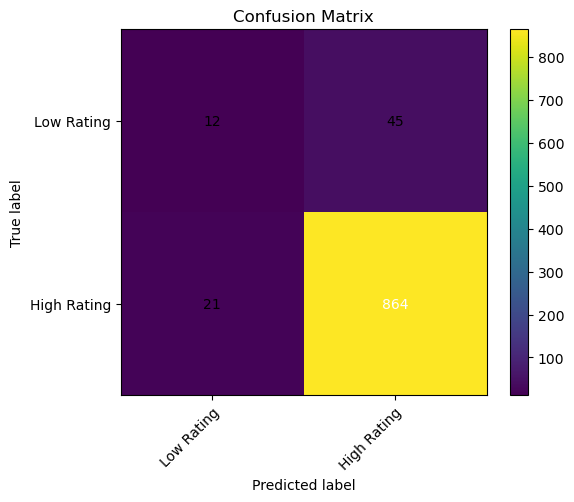

In [40]:
import numpy as np
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, interpolation='nearest')
ax.figure.colorbar(im, ax=ax)

classes = ['Low Rating','High Rating']
ax.set(
    xticks=np.arange(len(classes)),
    yticks=np.arange(len(classes)),
    xticklabels=classes,
    yticklabels=classes,
    ylabel='True label',
    xlabel='Predicted label',
    title='Confusion Matrix'
)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

# Feature Importance Bar Graph

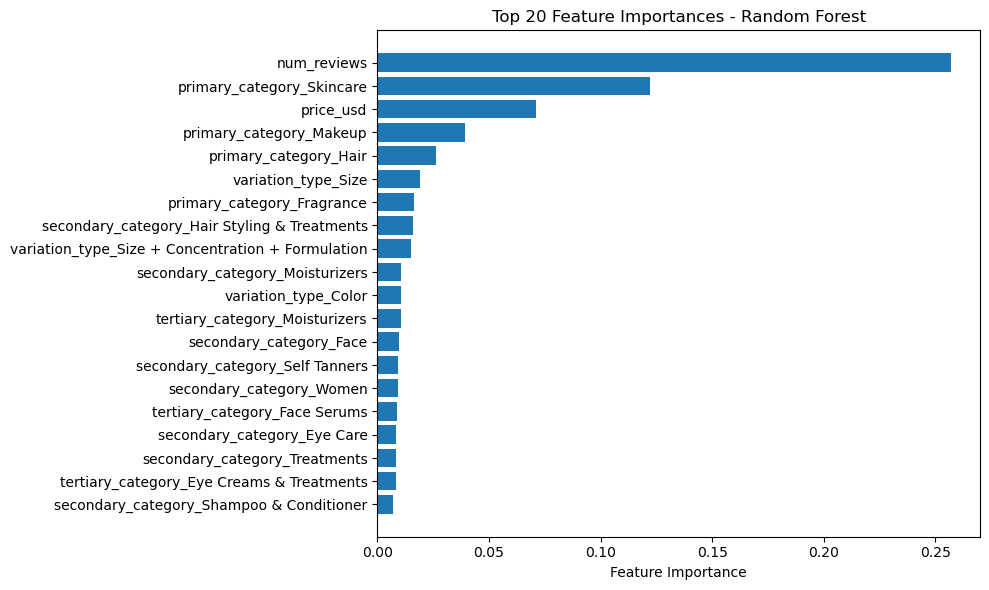

In [41]:
N = 20  
top_feat = feat_imp.head(N)

plt.figure(figsize=(10, 6))
plt.barh(top_feat['feature'][::-1], top_feat['importance'][::-1])
plt.xlabel("Feature Importance")
plt.title(f"Top {N} Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score

In [43]:
log_clf = LogisticRegression(max_iter = 2000, class_weight = 'balanced')

log_clf.fit(X_train_processed, y_train)

y_pred = log_clf.predict(X_test_processed)
y_proba = log_clf.predict_proba(X_test_processed)[:, 1]

In [44]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8184713375796179
ROC-AUC: 0.9100802854594112

Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.86      0.36        57
           1       0.99      0.82      0.89       885

    accuracy                           0.82       942
   macro avg       0.61      0.84      0.63       942
weighted avg       0.94      0.82      0.86       942



In [50]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

NameError: name 'ConfusionMatrixDisplay' is not defined

In [46]:
from sklearn.metrics import PrecisionRecallDisplay

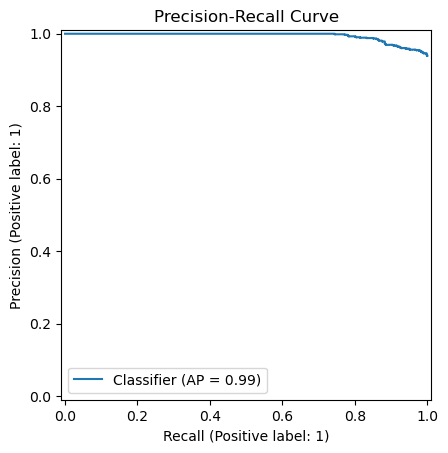

In [47]:
PrecisionRecallDisplay.from_predictions(y_test, y_proba)
plt.title("Precision-Recall Curve")
plt.show()

In [48]:
import numpy as np

In [49]:
coeffs = log_clf.coef_[0]
feature_names = preprocessor.get_feature_names_out()

coef_df = pd.DataFrame({"feature": feature_names, "coef": coeffs}).sort_values(
    "coef", ascending=False)
coef_df["odds_ratio"] = np.exp(coef_df["coef"])
coef_df.head(20)

,feature,coef,odds_ratio
35,cat__brand_name_Caudalie,2.361428,10.606082
201,cat__brand_name_StriVectin,2.111456,8.260263
50,cat__brand_name_Dermalogica,2.061516,7.857873
334,cat__tertiary_category_Face Oils,1.967304,7.151367
262,cat__primary_category_Makeup,1.766808,5.852144
119,cat__brand_name_Kate Somerville,1.656935,5.243216
68,cat__brand_name_FaceGym,1.625308,5.079982
239,cat__brand_name_Youth To The People,1.591857,4.912863
187,cat__brand_name_SK-II,1.559318,4.755579
195,cat__brand_name_Skinfix,1.487184,4.424619


In [54]:
# Predicted probability of class 1 = high_rating
y_test_proba = rf_clf.predict_proba(X_test_processed)[:, 1]


In [55]:
import pandas as pd

results = X_test.copy()                    
results = results.reset_index(drop=True)

results['high_rating_true'] = y_test.reset_index(drop=True)
results['pred_prob'] = y_test_proba

results.head()


,price_usd,num_reviews,brand_name,primary_category,secondary_category,tertiary_category,variation_type,new,sephora_exclusive,high_rating_true,pred_prob
0,22.0,0.0,Moroccanoil,Bath & Body,Body Moisturizers,Hand Cream & Foot Cream,Scent,0,0,1,1.00
1,88.0,351.0,Murad,Skincare,Treatments,Face Serums,Size,0,0,1,0.95
2,68.0,0.0,GUERLAIN,Makeup,Face,Highlighter,Color,0,0,1,1.00
3,28.0,0.0,Summer Fridays,Bath & Body,Body Moisturizers,Body Lotions & Body Oils,Size,0,1,1,1.00
4,24.0,0.0,Sol de Janeiro,Fragrance,Women,Body Mist & Hair Mist,Size + Concentration + Formulation,0,1,1,1.00


In [56]:
bins = [0, 10, 50, 100, 250, 500, 1000, results['num_reviews'].max() + 1]
labels = ['0–10', '11–50', '51–100', '101–250', '251–500', '501–1000', '1000+']

results['review_bin'] = pd.cut(
    results['num_reviews'],
    bins=bins,
    labels=labels,
    right=False
)

results[['num_reviews', 'review_bin', 'pred_prob']].head()


,num_reviews,review_bin,pred_prob
0,0.0,0–10,1.00
1,351.0,251–500,0.95
2,0.0,0–10,1.00
3,0.0,0–10,1.00
4,0.0,0–10,1.00


In [57]:
review_prob_table = (
    results
    .groupby('review_bin')
    .agg(
        avg_pred_prob=('pred_prob', 'mean'),
        count=('pred_prob', 'size'),
        avg_num_reviews=('num_reviews', 'mean')
    )
    .reset_index()
)

review_prob_table


C:\Users\visha\AppData\Local\Temp\ipykernel_30728\1341322821.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('review_bin')


,review_bin,avg_pred_prob,count,avg_num_reviews
0,0–10,0.990574,662,0.131420
1,11–50,0.635333,45,23.600000
2,51–100,0.788939,33,73.757576
3,101–250,0.838788,66,166.333333
4,251–500,0.861182,55,367.436364
5,501–1000,0.843571,49,663.877551
6,1000+,0.887500,32,1851.281250


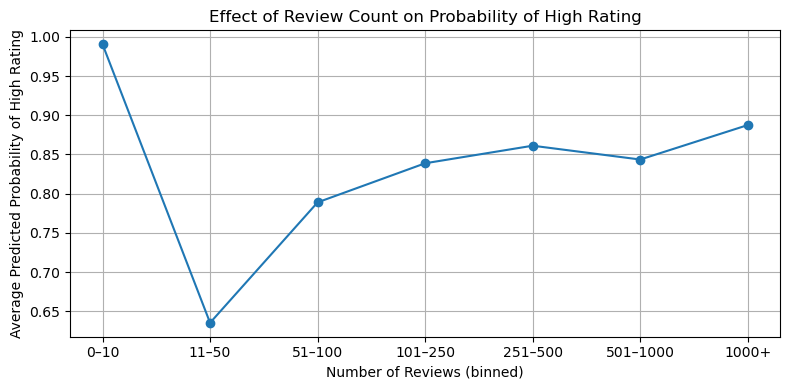

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(review_prob_table['review_bin'], review_prob_table['avg_pred_prob'], marker='o')
plt.xlabel("Number of Reviews (binned)")
plt.ylabel("Average Predicted Probability of High Rating")
plt.title("Effect of Review Count on Probability of High Rating")
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
bins = [0, 10, 50, 100, 250, 500, 1000, results['num_reviews'].max() + 1]
labels = ['0–10', '11–50', '51–100', '101–250', '251–500', '501–1000', '1000+']

results['review_bin'] = pd.cut(results['num_reviews'], bins=bins, labels=labels, right=False)

review_count_table = (
    results.groupby('review_bin')
           .agg(product_count=('num_reviews', 'size'),
                avg_num_reviews=('num_reviews', 'mean'))
           .reset_index()
)

review_count_table


C:\Users\visha\AppData\Local\Temp\ipykernel_30728\4030109150.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results.groupby('review_bin')


,review_bin,product_count,avg_num_reviews
0,0–10,662,0.131420
1,11–50,45,23.600000
2,51–100,33,73.757576
3,101–250,66,166.333333
4,251–500,55,367.436364
5,501–1000,49,663.877551
6,1000+,32,1851.281250


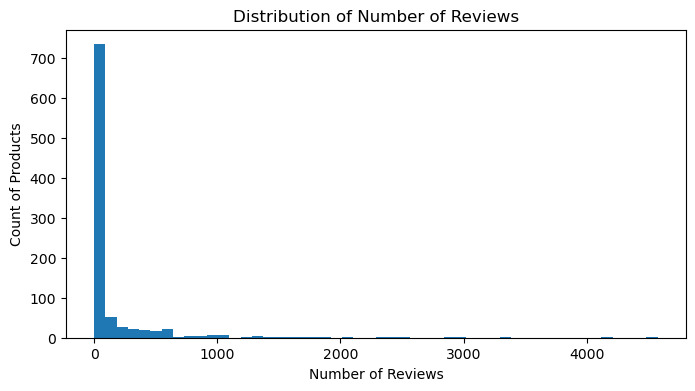

In [60]:
plt.figure(figsize=(8,4))
plt.hist(results['num_reviews'], bins=50)
plt.title("Distribution of Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Count of Products")
plt.show()

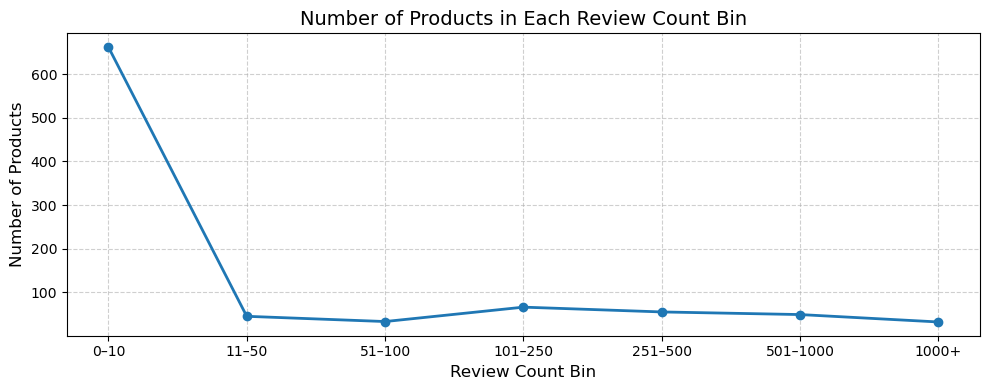

In [62]:
plt.figure(figsize=(10, 4))

plt.plot(
    review_count_table['review_bin'],
    review_count_table['product_count'],
    marker='o',     
    linewidth=2
)

plt.title("Number of Products in Each Review Count Bin", fontsize=14)
plt.xlabel("Review Count Bin", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()